In [11]:
import pandas as pd
import seaborn as sns
import os
from glob import glob
import matplotlib.pyplot as plt

(57629, 3)
37
37
../../acl_results/generated_definitions/merged/english/minimal/greedy50/english-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/english/minimal/greedy50/english-corpus1.tsv.gz
74
74
../../acl_results/generated_definitions/merged/english/maximal/greedy50/english-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/english/maximal/greedy50/english-corpus1.tsv.gz
111
111
   Average number of senses per 100 words     Merging
0                               88.996764  no_merging
1                               63.448276  no_merging
2                               30.606860  no_merging
3                               64.499170  no_merging
4                               64.279297  no_merging
saving to ../../acl_results/generated_definitions/merged/graphs/english.png


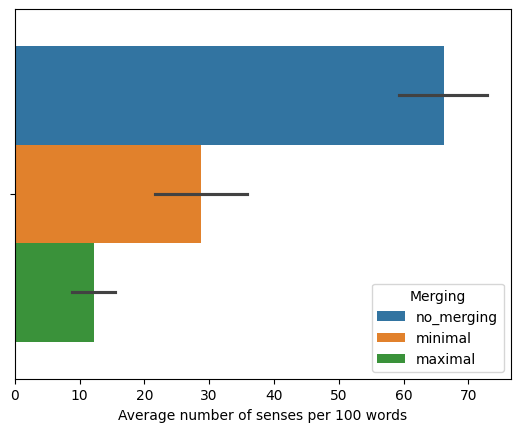

In [53]:
merged_path = "../../acl_results/generated_definitions/merged"
language = "english"
english = os.path.join(merged_path, language)
original = f"../../acl_results/generated_definitions/{language}/greedy/*.tsv.gz"
corpus_df_original = pd.DataFrame()
for i, corpus in enumerate(glob(original)):
    corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
    corpus_df_original = pd.concat((corpus_df_original, corpus_df))
print(corpus_df_original.shape)
number_of_senses_per_word = []
strategies = ["no_merging" for _ in range(len(corpus_df_original[0].unique()))]
for word in corpus_df_original[0].unique():
    this_word = corpus_df_original[corpus_df_original[0]==word]
    number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
print(len(number_of_senses_per_word))
print(len(strategies))
for strategy in ("minimal", "maximal"):
    strategy_path = os.path.join(english, strategy)
    gen_strategy_path = os.path.join(strategy_path, "greedy50")
    corpus_df_original = pd.DataFrame()
    for corpus in glob(gen_strategy_path + "/*.tsv.gz"):
        print(corpus)
        corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
        corpus_df_original = pd.concat((corpus_df_original, corpus_df))
    strategies.extend([strategy for _ in range(len(corpus_df_original[0].unique()))])
        #print(corpus_df.head())
    for word in corpus_df_original[0].unique():
        this_word = corpus_df_original[corpus_df_original[0]==word]
        number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
    print(len(number_of_senses_per_word))
    print(len(strategies))
data = pd.DataFrame({f'Average number of senses per 100 words':number_of_senses_per_word, "Merging": strategies},
                   )
print(data.head())
g = sns.barplot(
    data=data,
    hue="Merging",
    x='Average number of senses per 100 words',
                )
        #plt.show()
out = merged_path + "/graphs/" + f"{language}.png"
print(f"saving to {out}")
plt.savefig(out)

In [39]:
tips = sns.load_dataset("penguins")

In [40]:
tips.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
